# Section 1: Data loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv('insurance_train.csv')
test_data = pd.read_csv('insurance_test.csv')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    76879 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   sourcing_channel                  79853 non-null  object 
 10  residence_area_type               79853 non-null  object 
 11  premium                           79853 non-null  int64  
 12  targ

In [ ]:
train_data.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [ ]:
train_data.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'premium', 'target'],
      dtype='object')

Input:

*   id: Categorical Variable (Ordinal)
*   perc_premium_paid_by_cash_credit: Numerical Variable (Continuous)
*   age_in_days: Numerical Variable (Discrete)
*   Income: Numerical Variable (Discrete)
*   Count_3-6_months_late: Numerical Variable (Discrete)
*   Count_6-12_months_late: Numerical Variable (Discrete)
*   Count_more_than_12_months_late: Numerical Variable (Discrete)
*   application_underwriting_score: Numerical Variable (Continuous) -> điểm bảo lãnh
*   no_of_premiums_paid: Numerical Variable (Discrete)
*   sourcing_channel: Categorical Variable (Nomial)
*   residence_area_type: Categorical Variable (Nomial)
*   premium: Categorical Variable (Discrete)

Output:
*   target: Categorical Variable (Nomial)

In [ ]:
train_data.columns = ['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'income',
       'count_3-6_months_late', 'count_6-12_months_late',
       'count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'premium', 'target']

In [ ]:
test_data.columns = ['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'income',
       'count_3-6_months_late', 'count_6-12_months_late',
       'count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type']

In [ ]:
train_data.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,income,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [ ]:
combine = [train_data,test_data]

In [ ]:
type(combine)

list

# Section 2: Data Preprocessing

In [ ]:
train_data.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
income                                 0
count_3-6_months_late                 97
count_6-12_months_late                97
count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
target                                 0
dtype: int64

In [ ]:
test_data.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
income                                 0
count_3-6_months_late                 31
count_6-12_months_late                31
count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [ ]:
# Convert age_in_days into age

for dataset in combine:
  dataset['age'] = dataset['age_in_days']//365
  dataset.drop(['age_in_days'],axis=1,inplace=True)

In [ ]:
train_data.head()

,id,perc_premium_paid_by_cash_credit,income,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,59
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,48
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,86


In [ ]:
test_data.head()

,id,perc_premium_paid_by_cash_credit,income,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age
0,649,0.001,51150,0.0,0.0,0.0,99.89,7,A,Rural,75
1,81136,0.124,285140,0.0,0.0,0.0,98.93,19,A,Urban,65
2,70762,1.000,186030,0.0,0.0,0.0,NaN,2,B,Urban,47
3,53935,0.198,123540,0.0,0.0,0.0,99.00,11,B,Rural,44
4,15476,0.041,200020,1.0,0.0,0.0,99.17,14,A,Rural,29


In [ ]:
train_data[['sourcing_channel','target']].groupby('sourcing_channel',as_index=False).mean()

,sourcing_channel,target
0,A,0.945542
1,B,0.935441
2,C,0.924994
3,D,0.916126
4,E,0.924466


In [ ]:
train_data[['residence_area_type','target']].groupby('residence_area_type',as_index=False).mean()

,residence_area_type,target
0,Rural,0.936912
1,Urban,0.937737


In [ ]:
# Cut the income values into 5 groups

train_data['incomebands'] = pd.cut(train_data['income'],5)

In [ ]:
train_data[['incomebands','target']].groupby('incomebands',as_index=False).count()

,incomebands,target
0,"(-66208.57, 18071744.0]",79846
1,"(18071744.0, 36119458.0]",4
2,"(36119458.0, 54167172.0]",2
3,"(54167172.0, 72214886.0]",0
4,"(72214886.0, 90262600.0]",1


In [ ]:
# Due to the big gap in income => Using standardizing method to adjust the values
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler = scaler.fit(train_data[['income']])
x_scaler = scaler.transform(train_data[['income']])
x_scaler

array([[0.00366839],
       [0.00322611],
       [0.00066612],
       ...,
       [0.00311386],
       [0.00016955],
       [0.00283814]])

In [ ]:
train_data['scaled_income'] = x_scaler
train_data.head()

,id,perc_premium_paid_by_cash_credit,income,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,incomebands,scaled_income
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33,"(-66208.57, 18071744.0]",0.003668
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,59,"(-66208.57, 18071744.0]",0.003226
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,48,"(-66208.57, 18071744.0]",0.000666
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42,"(-66208.57, 18071744.0]",0.002510
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,86,"(-66208.57, 18071744.0]",0.001935


In [ ]:
train_data['income_band'] = pd.cut(train_data['scaled_income'],5)

In [ ]:
train_data[['income_band','target']].groupby('income_band',as_index=False).count()

,income_band,target
0,"(-0.001, 0.2]",79846
1,"(0.2, 0.4]",4
2,"(0.4, 0.6]",2
3,"(0.6, 0.8]",0
4,"(0.8, 1.0]",1


In [ ]:
# Deal with outliers in 'income' variable

print(train_data['income'].mean())
print(train_data['income'].median())

208847.17117703782
166560.0


<ipython-input-28-a1dc3b6923d5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['income'],kde=False)


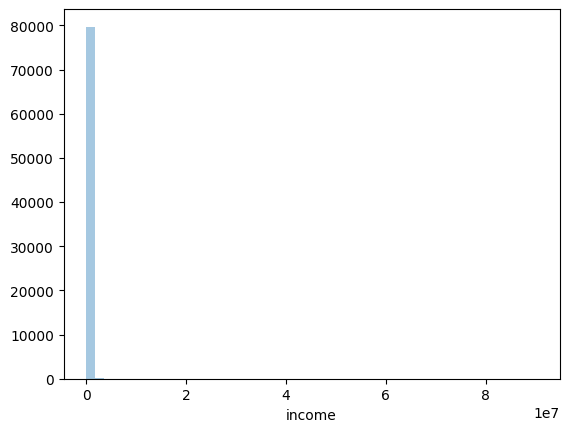

In [ ]:
sns.distplot(train_data['income'],kde=False)
plt.show()

In [ ]:
upper_bound = 0.95
lower_bound = 0.1
res = train_data['income'].quantile([lower_bound,upper_bound])
res

0.10     71200.0
0.95    450050.0
Name: income, dtype: float64

In [ ]:
 # Collect all values within this range and remove others
true_index = (train_data['income'] < res.loc[upper_bound])
true_index

0        True
1        True
2        True
3        True
4        True
         ... 
79848    True
79849    True
79850    True
79851    True
79852    True
Name: income, Length: 79853, dtype: bool

In [ ]:
false_index = ~true_index # ~ is different

In [ ]:
no_outlier_data = train_data[true_index].copy()
no_outlier_data.head()

,id,perc_premium_paid_by_cash_credit,income,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,incomebands,scaled_income,income_band
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33,"(-66208.57, 18071744.0]",0.003668,"(-0.001, 0.2]"
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,59,"(-66208.57, 18071744.0]",0.003226,"(-0.001, 0.2]"
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,48,"(-66208.57, 18071744.0]",0.000666,"(-0.001, 0.2]"
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42,"(-66208.57, 18071744.0]",0.002510,"(-0.001, 0.2]"
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,86,"(-66208.57, 18071744.0]",0.001935,"(-0.001, 0.2]"


In [ ]:
  # Create an income group for the new dataset

no_outlier_data['income_band'] = pd.cut(no_outlier_data['income'],5)
no_outlier_data[['income_band','target']].groupby('income_band',as_index=False).count()

,income_band,target
0,"(23603.99, 109232.0]",20493
1,"(109232.0, 194434.0]",26922
2,"(194434.0, 279636.0]",16575
3,"(279636.0, 364838.0]",8587
4,"(364838.0, 450040.0]",3269


In [ ]:
combine = [train_data, test_data]
for dataset in combine:
    dataset.loc[ dataset['income'] <= 23603.99, 'income'] = 0
    dataset.loc[(dataset['income'] > 23603.99) & (dataset['income'] <= 109232.0), 'income'] = 1
    dataset.loc[(dataset['income'] > 109232.0) & (dataset['income'] <= 194434.0), 'income'] = 2
    dataset.loc[(dataset['income'] > 194434.0) & (dataset['income'] <= 279636.0), 'income'] = 3
    dataset.loc[(dataset['income'] > 279636.0) & (dataset['income'] <= 364838.0), 'income'] = 4
    dataset.loc[(dataset['income'] > 364838.0) & (dataset['income'] <= 450040.0), 'income'] = 5
    dataset.loc[ dataset['income'] > 450040.0, 'income'] = 6

train_data.head(10)

,id,perc_premium_paid_by_cash_credit,income,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,incomebands,scaled_income,income_band
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33,"(-66208.57, 18071744.0]",0.003668,"(-0.001, 0.2]"
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,59,"(-66208.57, 18071744.0]",0.003226,"(-0.001, 0.2]"
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,48,"(-66208.57, 18071744.0]",0.000666,"(-0.001, 0.2]"
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42,"(-66208.57, 18071744.0]",0.002510,"(-0.001, 0.2]"
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,86,"(-66208.57, 18071744.0]",0.001935,"(-0.001, 0.2]"
5,59951,0.540,4,2.0,0.0,0.0,99.18,9,B,Rural,22200,1,48,"(-66208.57, 18071744.0]",0.002860,"(-0.001, 0.2]"
6,54031,1.000,2,0.0,0.0,0.0,99.05,11,B,Urban,7500,1,68,"(-66208.57, 18071744.0]",0.001046,"(-0.001, 0.2]"
7,94290,1.000,2,1.0,6.0,4.0,99.33,3,A,Urban,9600,0,60,"(-66208.57, 18071744.0]",0.001731,"(-0.001, 0.2]"
8,93730,0.621,1,0.0,0.0,0.0,99.58,4,A,Urban,7500,1,27,"(-66208.57, 18071744.0]",0.000759,"(-0.001, 0.2]"
9,84844,0.908,1,2.0,0.0,0.0,98.91,11,A,Rural,5400,0,63,"(-66208.57, 18071744.0]",0.000921,"(-0.001, 0.2]"


In [ ]:
train_data.loc[false_index,'income'] = 5

In [ ]:
train_data.drop(['incomebands','scaled_income','income_band'],axis=1,inplace=True)

In [ ]:
train_data.head()

,id,perc_premium_paid_by_cash_credit,income,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,59
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,48
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,86


In [ ]:
train_data['ageband'] = pd.cut(train_data['age'],5)
train_data[['ageband','target']].groupby('ageband',as_index=False).count()

,ageband,target
0,"(20.918, 37.4]",14314
1,"(37.4, 53.8]",30585
2,"(53.8, 70.2]",26773
3,"(70.2, 86.6]",7531
4,"(86.6, 103.0]",650


In [ ]:
for dataset in combine:
  dataset.loc[dataset['age'] <= 37.4, 'age'] = 0
  dataset.loc[(dataset['age'] > 37.4) & (dataset['age'] <= 53.8), 'age'] = 1
  dataset.loc[(dataset['age'] > 53.8) & (dataset['age'] <= 70.2), 'age'] = 2
  dataset.loc[(dataset['age'] > 70.2) & (dataset['age'] <= 86.6), 'age'] = 3
  dataset.loc[(dataset['age'] > 86.6),'age'] = 4

train_data.drop(['ageband'],axis=1,inplace=True)
combine = [train_data,test_data]
train_data.head()

,id,perc_premium_paid_by_cash_credit,income,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,0
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,2
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,1
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,1
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,3


In [ ]:
train_data[['age','application_underwriting_score']].groupby('age',as_index=False).mean()

,age,application_underwriting_score
0,0,99.145848
1,1,98.978552
2,2,99.057655
3,3,99.300457
4,4,99.537480


In [ ]:
train_data['premband'] = pd.cut(train_data['no_of_premiums_paid'],5)
train_data[['premband','application_underwriting_score']].groupby('premband',as_index=False).count()

,premband,application_underwriting_score
0,"(1.942, 13.6]",56830
1,"(13.6, 25.2]",18944
2,"(25.2, 36.8]",1023
3,"(36.8, 48.4]",62
4,"(48.4, 60.0]",20


In [ ]:
print('mean: ',train_data['application_underwriting_score'].mean())
print('std: ',train_data['application_underwriting_score'].std())

mean:  99.06729119785638
std:  0.7397990154151038


In [ ]:
print(train_data[train_data['sourcing_channel'] == 'A']['application_underwriting_score'].std())

train_data[['sourcing_channel','target']].groupby('sourcing_channel',as_index=False).mean()

0.7695318642626953


,sourcing_channel,target
0,A,0.945542
1,B,0.935441
2,C,0.924994
3,D,0.916126
4,E,0.924466


In [ ]:
train_data[['sourcing_channel','application_underwriting_score']].groupby('sourcing_channel',as_index=False).mean()

,sourcing_channel,application_underwriting_score
0,A,99.102432
1,B,99.055857
2,C,98.979512
3,D,99.038356
4,E,99.067980


In [ ]:
train_data[['residence_area_type','application_underwriting_score']].groupby('residence_area_type',as_index=False).mean()

,residence_area_type,application_underwriting_score
0,Rural,99.062726
1,Urban,99.070299


We can set the values of application underwriting score on the basis of sourcing channel

In [ ]:
train_data.dtypes

id                                     int64
perc_premium_paid_by_cash_credit     float64
income                                 int64
count_3-6_months_late                float64
count_6-12_months_late               float64
count_more_than_12_months_late       float64
application_underwriting_score       float64
no_of_premiums_paid                    int64
sourcing_channel                      object
residence_area_type                   object
premium                                int64
target                                 int64
age                                    int64
premband                            category
dtype: object

In [ ]:
dataset[dataset['application_underwriting_score'].isnull()]

,id,perc_premium_paid_by_cash_credit,income,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age
2,70762,1.000,2,0.0,0.0,0.0,NaN,2,B,Urban,1
19,70148,0.000,1,0.0,0.0,0.0,NaN,4,A,Urban,0
23,25051,1.000,2,0.0,1.0,0.0,NaN,2,B,Rural,1
33,17255,1.000,1,0.0,0.0,0.0,NaN,6,A,Rural,3
64,8299,0.139,1,0.0,0.0,0.0,NaN,3,A,Rural,3
...,...,...,...,...,...,...,...,...,...,...,...
34119,95997,0.000,1,0.0,0.0,0.0,NaN,6,A,Rural,2
34154,30840,1.000,1,0.0,0.0,0.0,NaN,2,A,Urban,4
34170,105538,0.005,1,0.0,0.0,0.0,NaN,6,A,Rural,3
34178,105954,0.000,1,0.0,0.0,0.0,NaN,6,A,Urban,0


In [ ]:
combine = [train_data,test_data] # execute on both dataset simultaneously

for dataset in combine:
  mask1 = dataset['application_underwriting_score'].isnull()
  for source in ['A','B','C','D','E']:
    mask2 = (dataset['sourcing_channel'] == source)
    source_mean = dataset[dataset['sourcing_channel'] == source]['application_underwriting_score'].mean()
    dataset.loc[mask1 & mask2,'application_underwriting_score'] = source_mean

train_data.head()

,id,perc_premium_paid_by_cash_credit,income,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,premband
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,0,"(1.942, 13.6]"
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,2,"(13.6, 25.2]"
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,1,"(1.942, 13.6]"
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,1,"(1.942, 13.6]"
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,3,"(1.942, 13.6]"


In [ ]:
train_data['application_underwriting_score'].isnull().any()

False

In [ ]:
train_data[train_data['count_3-6_months_late'].isnull()]

,id,perc_premium_paid_by_cash_credit,income,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,premband
158,73099,1.0,3,NaN,NaN,NaN,99.102432,2,A,Urban,9600,0,1,"(1.942, 13.6]"
1216,81690,1.0,1,NaN,NaN,NaN,99.102432,2,A,Rural,1200,0,0,"(1.942, 13.6]"
1471,49862,1.0,1,NaN,NaN,NaN,99.102432,2,A,Rural,1200,0,0,"(1.942, 13.6]"
3092,59,1.0,1,NaN,NaN,NaN,99.102432,2,A,Urban,5700,1,1,"(1.942, 13.6]"
4177,19184,1.0,1,NaN,NaN,NaN,99.102432,2,A,Rural,1200,0,1,"(1.942, 13.6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75205,57976,1.0,1,NaN,NaN,NaN,99.870000,2,D,Rural,9600,0,1,"(1.942, 13.6]"
75360,66964,1.0,1,NaN,NaN,NaN,99.102432,2,A,Rural,1200,0,2,"(1.942, 13.6]"
76274,14842,1.0,1,NaN,NaN,NaN,99.850000,2,A,Rural,5400,1,0,"(1.942, 13.6]"
77321,101186,1.0,1,NaN,NaN,NaN,99.055857,2,B,Urban,3300,1,1,"(1.942, 13.6]"


<Axes: xlabel='count_3-6_months_late', ylabel='count'>

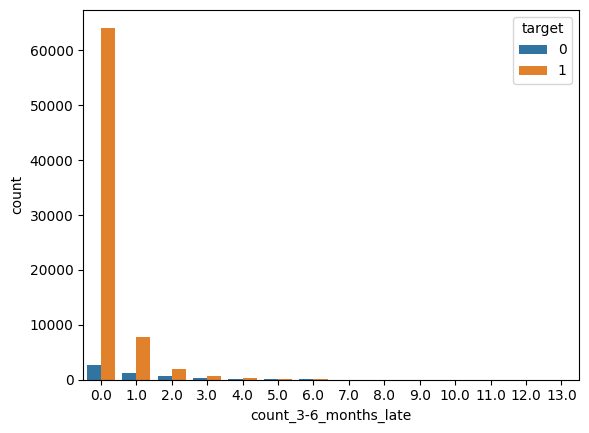

In [ ]:
sns.countplot(data=train_data,x='count_3-6_months_late',hue='target')

<Axes: xlabel='count_6-12_months_late', ylabel='count'>

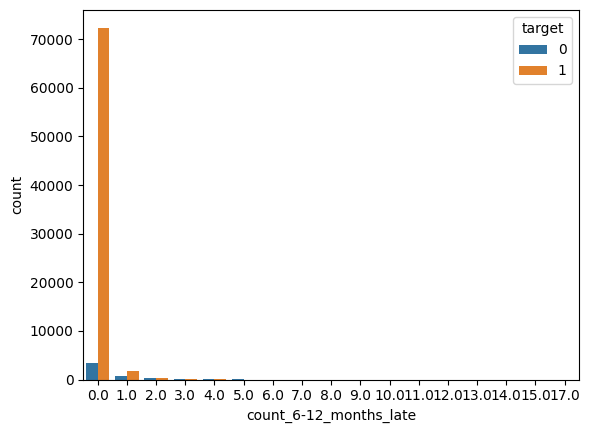

In [ ]:
sns.countplot(data=train_data,x='count_6-12_months_late',hue='target')

In [ ]:
# Create 'late_premium' column
combine = [train_data,test_data]
for dataset in combine:
  dataset['late_premium'] = 0.0

train_data.head()

,id,perc_premium_paid_by_cash_credit,income,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,premband,late_premium
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,0,"(1.942, 13.6]",0.0
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,2,"(13.6, 25.2]",0.0
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,1,"(1.942, 13.6]",0.0
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,1,"(1.942, 13.6]",0.0
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,3,"(1.942, 13.6]",0.0


In [ ]:
combine = [train_data,test_data]
for dataset in combine:
  dataset.loc[dataset['count_3-6_months_late'].isnull(),'late_premium'] = np.NaN
  dataset.loc[dataset['count_3-6_months_late'].notnull(),'late_premium'] = dataset['count_3-6_months_late'] + dataset['count_6-12_months_late'] + dataset['count_more_than_12_months_late']

In [ ]:
train_data.head()

,id,perc_premium_paid_by_cash_credit,income,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,premband,late_premium
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,0,"(1.942, 13.6]",0.0
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,2,"(13.6, 25.2]",0.0
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,1,"(1.942, 13.6]",6.0
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,1,"(1.942, 13.6]",0.0
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,3,"(1.942, 13.6]",0.0


In [ ]:
train_data['target'].corr(train_data['late_premium'])

-0.35639625161362404

<ipython-input-57-35369825f2e4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test_data.corr(),annot=True)


<Axes: >

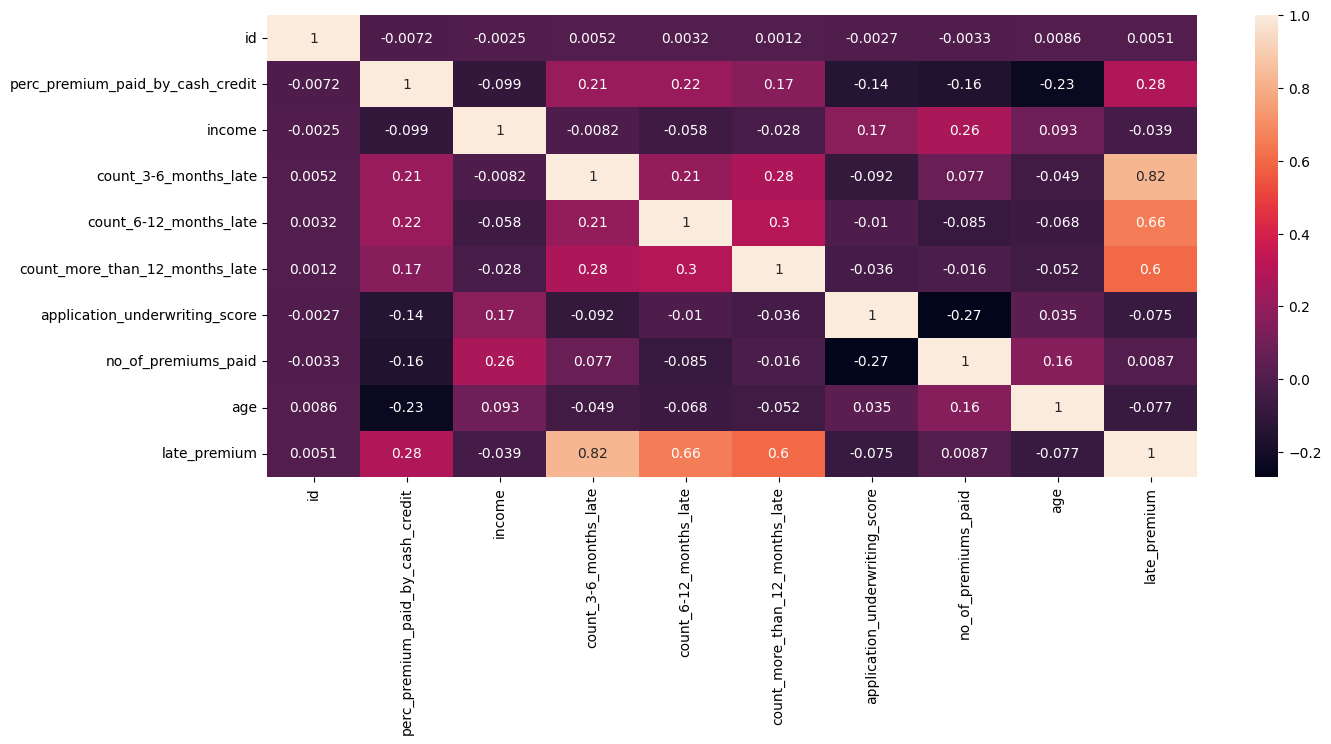

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(test_data.corr(),annot=True)

<Axes: xlabel='perc_premium_paid_by_cash_credit', ylabel='late_premium'>

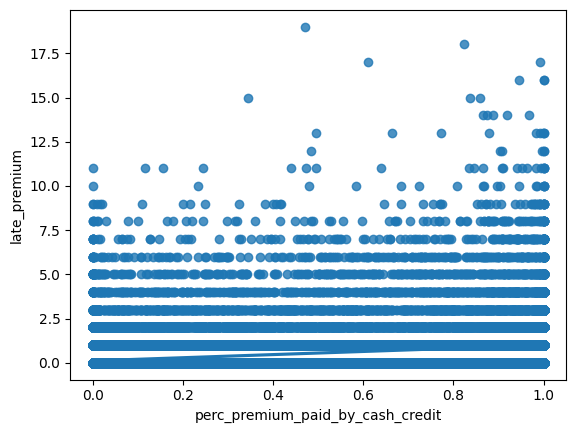

In [ ]:
sns.regplot(data=train_data,x='perc_premium_paid_by_cash_credit',y='late_premium')

<Axes: xlabel='late_premium', ylabel='count'>

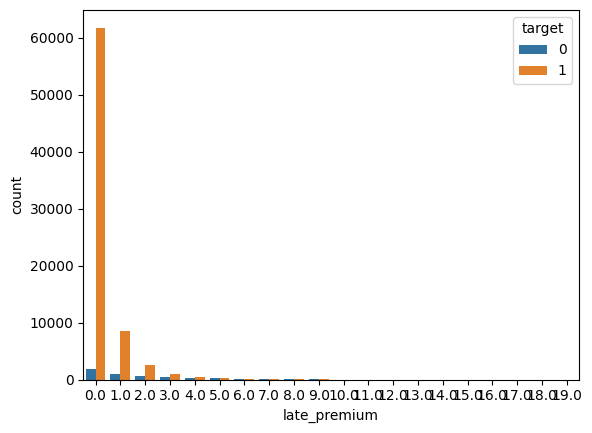

In [ ]:
sns.countplot(data=train_data,x='late_premium',hue='target')

In [ ]:
train_data[['late_premium','target']].groupby('late_premium',as_index=False).mean()

,late_premium,target
0,0.0,0.971659
1,1.0,0.890487
2,2.0,0.780694
3,3.0,0.695418
4,4.0,0.579800
5,5.0,0.510684
6,6.0,0.441696
7,7.0,0.487654
8,8.0,0.455556
9,9.0,0.411765


In [ ]:
train_data.loc[train_data['late_premium'].isnull()]

,id,perc_premium_paid_by_cash_credit,income,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,premband,late_premium
158,73099,1.0,3,NaN,NaN,NaN,99.102432,2,A,Urban,9600,0,1,"(1.942, 13.6]",NaN
1216,81690,1.0,1,NaN,NaN,NaN,99.102432,2,A,Rural,1200,0,0,"(1.942, 13.6]",NaN
1471,49862,1.0,1,NaN,NaN,NaN,99.102432,2,A,Rural,1200,0,0,"(1.942, 13.6]",NaN
3092,59,1.0,1,NaN,NaN,NaN,99.102432,2,A,Urban,5700,1,1,"(1.942, 13.6]",NaN
4177,19184,1.0,1,NaN,NaN,NaN,99.102432,2,A,Rural,1200,0,1,"(1.942, 13.6]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75205,57976,1.0,1,NaN,NaN,NaN,99.870000,2,D,Rural,9600,0,1,"(1.942, 13.6]",NaN
75360,66964,1.0,1,NaN,NaN,NaN,99.102432,2,A,Rural,1200,0,2,"(1.942, 13.6]",NaN
76274,14842,1.0,1,NaN,NaN,NaN,99.850000,2,A,Rural,5400,1,0,"(1.942, 13.6]",NaN
77321,101186,1.0,1,NaN,NaN,NaN,99.055857,2,B,Urban,3300,1,1,"(1.942, 13.6]",NaN


In [ ]:
train_data.loc[(train_data['target'] == 0) & (train_data['late_premium'].isnull()),'late_premium'] = 7
train_data.loc[(train_data['target'] == 1) & (train_data['late_premium'].isnull()),'late_premium'] = 2

In [ ]:
train_data['late_premium'].isnull().any()

False

In [ ]:
print(train_data.isnull().sum())
print('\n')
print(test_data.isnull().sum())

id                                   0
perc_premium_paid_by_cash_credit     0
income                               0
count_3-6_months_late               97
count_6-12_months_late              97
count_more_than_12_months_late      97
application_underwriting_score       0
no_of_premiums_paid                  0
sourcing_channel                     0
residence_area_type                  0
premium                              0
target                               0
age                                  0
premband                             0
late_premium                         0
dtype: int64


id                                   0
perc_premium_paid_by_cash_credit     0
income                               0
count_3-6_months_late               31
count_6-12_months_late              31
count_more_than_12_months_late      31
application_underwriting_score       0
no_of_premiums_paid                  0
sourcing_channel                     0
residence_area_type                  0
age       

In [ ]:
# replace the null-value in late_premium column in the test_data

In [ ]:
guess_prem = np.zeros(5)
for dataset in [test_data]:
  for i in range(1,6):
    guess_df = dataset[(dataset['income'] == i)]['late_premium'].dropna()

    # age_mean = guess_df.mean()
    # age_std = guess_df.std()
    # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

    premium_guess = guess_df.median()
    guess_prem[i-1] = int(premium_guess)

  for j in range (1,6):
    dataset.loc[(dataset['late_premium'].isnull()) & (dataset['income'] == j), 'late_premium'] = guess_prem[j-1] + 1

  dataset['late_premium'] = dataset['late_premium'].astype(int)

test_data.head(10)

,id,perc_premium_paid_by_cash_credit,income,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age,late_premium
0,649,0.001,1,0.0,0.0,0.0,99.890000,7,A,Rural,3,0
1,81136,0.124,4,0.0,0.0,0.0,98.930000,19,A,Urban,2,0
2,70762,1.000,2,0.0,0.0,0.0,99.043758,2,B,Urban,1,0
3,53935,0.198,2,0.0,0.0,0.0,99.000000,11,B,Rural,1,0
4,15476,0.041,3,1.0,0.0,0.0,99.170000,14,A,Rural,0,1
5,64797,0.112,3,0.0,0.0,0.0,98.880000,7,B,Rural,1,0
6,67412,0.325,5,6.0,0.0,0.0,99.000000,27,C,Urban,1,6
7,44241,0.362,1,3.0,0.0,0.0,98.400000,14,A,Urban,2,3
8,5069,0.115,4,0.0,0.0,0.0,99.880000,6,D,Rural,2,0
9,16615,0.021,6,0.0,0.0,0.0,99.890000,11,B,Urban,2,0


In [ ]:
test_data.drop(['count_3-6_months_late','count_6-12_months_late','count_more_than_12_months_late'],axis=1,inplace=True)
train_data.drop(['count_3-6_months_late','count_6-12_months_late','count_more_than_12_months_late'],axis=1,inplace=True)

In [ ]:
  # Convert area type and sourcing channel to Ordinal Variables

combine = [train_data, test_data]
for dataset in combine:
    dataset['residence_area_type'] = dataset['residence_area_type'].map( {'Urban' : 1, 'Rural' : 0} )
    dataset['sourcing_channel'] = dataset['sourcing_channel'].map( {'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3, 'E' : 4} )
train_data.head()

,id,perc_premium_paid_by_cash_credit,income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,premband,late_premium
0,110936,0.429,4,99.02,13,2,1,3300,1,0,"(1.942, 13.6]",0.0
1,41492,0.010,4,99.89,21,0,1,18000,1,2,"(13.6, 25.2]",0.0
2,31300,0.917,1,98.69,7,2,0,3300,0,1,"(1.942, 13.6]",6.0
3,19415,0.049,3,99.57,9,0,1,9600,1,1,"(1.942, 13.6]",0.0
4,99379,0.052,3,99.87,12,1,1,9600,1,3,"(1.942, 13.6]",0.0


In [ ]:
train_data['application_underwriting_score'] = train_data['application_underwriting_score']/100
train_data.head()

,id,perc_premium_paid_by_cash_credit,income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,premband,late_premium
0,110936,0.429,4,0.9902,13,2,1,3300,1,0,"(1.942, 13.6]",0.0
1,41492,0.010,4,0.9989,21,0,1,18000,1,2,"(13.6, 25.2]",0.0
2,31300,0.917,1,0.9869,7,2,0,3300,0,1,"(1.942, 13.6]",6.0
3,19415,0.049,3,0.9957,9,0,1,9600,1,1,"(1.942, 13.6]",0.0
4,99379,0.052,3,0.9987,12,1,1,9600,1,3,"(1.942, 13.6]",0.0


In [ ]:
upper_bound = 0.95
res = train_data['no_of_premiums_paid'].quantile([upper_bound])
print(res)

0.95    20.0
Name: no_of_premiums_paid, dtype: float64


In [ ]:
true_index = train_data['no_of_premiums_paid'] < res.values[0]
false_index = ~true_index

In [ ]:
train_data['premband'] = pd.cut(train_data[true_index]['no_of_premiums_paid'],4)

In [ ]:
train_data[['premband','application_underwriting_score']].groupby('premband',as_index=False).count()

,premband,application_underwriting_score
0,"(1.983, 6.25]",15229
1,"(6.25, 10.5]",27838
2,"(10.5, 14.75]",20542
3,"(14.75, 19.0]",11244


In [ ]:
upper_bound = 0.9
res = train_data['premium'].quantile([upper_bound])
print(res)

0.9    22200.0
Name: premium, dtype: float64


In [ ]:
type(res)

pandas.core.series.Series

In [ ]:
res.loc[upper_bound]

22200.0

In [ ]:
res.index[0]

0.9

In [ ]:
res.values[0]

22200.0

In [ ]:
true_index = train_data['premium'] < res.values[0]
false_index = ~true_index

In [ ]:
true_index

0         True
1         True
2         True
3         True
4         True
         ...  
79848     True
79849    False
79850     True
79851     True
79852     True
Name: premium, Length: 79853, dtype: bool

In [ ]:
train_data['premband'] = pd.cut(train_data[true_index]['premium'],4)
train_data[['premband','target']].groupby('premband').count()

,target
premband,
"(1181.1, 5925.0]",30760
"(5925.0, 10650.0]",18613
"(10650.0, 15375.0]",13380
"(15375.0, 20100.0]",8315


In [ ]:
train_data.head()

,id,perc_premium_paid_by_cash_credit,income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,premband,late_premium
0,110936,0.429,4,0.9902,13,2,1,3300,1,0,"(1181.1, 5925.0]",0.0
1,41492,0.010,4,0.9989,21,0,1,18000,1,2,"(15375.0, 20100.0]",0.0
2,31300,0.917,1,0.9869,7,2,0,3300,0,1,"(1181.1, 5925.0]",6.0
3,19415,0.049,3,0.9957,9,0,1,9600,1,1,"(5925.0, 10650.0]",0.0
4,99379,0.052,3,0.9987,12,1,1,9600,1,3,"(5925.0, 10650.0]",0.0


In [ ]:
combine = [train_data]
for dataset in combine:
  dataset.loc[dataset['premium'] <= 5925.0,'premium'] = 0
  dataset.loc[(dataset['premium'] > 5925.0) & (dataset['premium'] <= 10650.0),'premium'] = 1
  dataset.loc[(dataset['premium'] > 10650.0) & (dataset['premium'] <= 15375.0),'premium'] = 2
  dataset.loc[(dataset['premium'] > 15375.0) & (dataset['premium'] <= 20100.0),'premium'] = 3
  dataset.loc[(dataset['premium'] > 20100.0),'premium'] = 4

train_data.drop(['premband'],axis=1,inplace=True)

In [ ]:
train_data.head()

,id,perc_premium_paid_by_cash_credit,income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,late_premium
0,110936,0.429,4,0.9902,13,2,1,0,1,0,0.0
1,41492,0.010,4,0.9989,21,0,1,3,1,2,0.0
2,31300,0.917,1,0.9869,7,2,0,0,0,1,6.0
3,19415,0.049,3,0.9957,9,0,1,1,1,1,0.0
4,99379,0.052,3,0.9987,12,1,1,1,1,3,0.0


In [ ]:
train_data['premband'] = pd.cut(train_data['perc_premium_paid_by_cash_credit'],4)
train_data[['premband','target']].groupby('premband',as_index=False).mean()

,premband,target
0,"(-0.001, 0.25]",0.976381
1,"(0.25, 0.5]",0.945482
2,"(0.5, 0.75]",0.900194
3,"(0.75, 1.0]",0.817460


In [ ]:
combine = [train_data,test_data]
for dataset in combine:
  dataset.loc[(dataset['perc_premium_paid_by_cash_credit'] <= 0.25,'perc_premium_paid_by_cash_credit')] = 0
  dataset.loc[(dataset['perc_premium_paid_by_cash_credit'] > 0.25) & (dataset['perc_premium_paid_by_cash_credit'] <= 0.5), 'perc_premium_paid_by_cash_credit'] = 1
  dataset.loc[(dataset['perc_premium_paid_by_cash_credit'] > 0.5) & (dataset['perc_premium_paid_by_cash_credit'] <= 0.75), 'perc_premium_paid_by_cash_credit'] = 2
  dataset.loc[(dataset['perc_premium_paid_by_cash_credit'] > 0.75) & (dataset['perc_premium_paid_by_cash_credit'] <= 1.0), 'perc_premium_paid_by_cash_credit'] = 3
  dataset.loc[(dataset['perc_premium_paid_by_cash_credit'] > 1.0,'perc_premium_paid_by_cash_credit')] = 4

In [ ]:
train_data.drop(['premband'],axis=1,inplace=True)

In [ ]:
train_data.head()

,id,perc_premium_paid_by_cash_credit,income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,late_premium
0,110936,4.0,4,0.9902,13,2,1,0,1,0,0.0
1,41492,0.0,4,0.9989,21,0,1,3,1,2,0.0
2,31300,4.0,1,0.9869,7,2,0,0,0,1,6.0
3,19415,0.0,3,0.9957,9,0,1,1,1,1,0.0
4,99379,0.0,3,0.9987,12,1,1,1,1,3,0.0


In [ ]:
test_data.head()

,id,perc_premium_paid_by_cash_credit,income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age,late_premium
0,649,0.0,1,99.890000,7,0,0,3,0
1,81136,0.0,4,98.930000,19,0,1,2,0
2,70762,4.0,2,99.043758,2,1,1,1,0
3,53935,0.0,2,99.000000,11,1,0,1,0
4,15476,0.0,3,99.170000,14,0,0,0,1


In [ ]:
train_data[['perc_premium_paid_by_cash_credit','late_premium']] = train_data[['perc_premium_paid_by_cash_credit','late_premium']].astype(int)
test_data[['perc_premium_paid_by_cash_credit']] = test_data[['perc_premium_paid_by_cash_credit']].astype(int)

In [ ]:
train_data.dtypes

id                                    int64
perc_premium_paid_by_cash_credit      int64
income                                int64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                      int64
residence_area_type                   int64
premium                               int64
target                                int64
age                                   int64
late_premium                          int64
dtype: object

# Section 5: Prediction

In [ ]:
from math import sqrt

from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import sem

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import accuracy_score, mean_squared_error

"ols" function stands for "ordinary least squares." It is a method used for fitting linear regression models to data

In [ ]:
X_train = train_data.drop(['id','target','premium','perc_premium_paid_by_cash_credit'],axis=1).copy()
y_train = train_data['target']
X_test = test_data.drop(['id','perc_premium_paid_by_cash_credit'],axis=1).copy()
print('X train: ',X_train.shape)
print('y train: ',y_train.shape)
print('X test: ',X_test.shape)

X train:  (79853, 7)
y train:  (79853,)
X test:  (34224, 7)


In [ ]:
X_train.head()

,income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age,late_premium
0,4,0.9902,13,2,1,0,0
1,4,0.9989,21,0,1,2,0
2,1,0.9869,7,2,0,1,6
3,3,0.9957,9,0,1,1,0
4,3,0.9987,12,1,1,3,0


## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
accuracy_score_log = round(logreg.score(X_train,y_train)*100,2) # calculate the accuracy on the basis of training data
accuracy_score_log

93.93

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score_knn = round(knn.score(X_train,y_train)*100,2)
accuracy_score_knn

94.6

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
y_pred = decision_tree.predict(X_test)
accuracy_score_decision_tree = round(decision_tree.score(X_train,y_train)*100,2)
accuracy_score_decision_tree

99.29

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)
accuracy_score_random_forest = round(random_forest.score(X_train,y_train)*100,2)
accuracy_score_random_forest

99.29

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)
y_pred = naive_bayes.predict(X_test)
accuracy_score_nb = round(naive_bayes.score(X_train,y_train)*100,2)
accuracy_score_nb

92.39

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
'''
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_score_svc = round(svc.score(X_train,y_train)*100,2)
accuracy_score_svc
'''

'\nsvc = SVC()\nsvc.fit(X_train,y_train)\ny_pred = svc.predict(X_test)\naccuracy_score_svc = round(svc.score(X_train,y_train)*100,2)\naccuracy_score_svc\n'

In [ ]:
pred_values = pd.DataFrame(
    {'Algorithms':['LogisticRegression','KNN','DecisionTree','RandomForest','Naive Bayes'],
    'Accuracy Score':[accuracy_score_log,accuracy_score_knn,accuracy_score_decision_tree,accuracy_score_random_forest,accuracy_score_nb]}
)

In [ ]:
pred_values.sort_values(by='Accuracy Score',ascending=False)

,Algorithms,Accuracy Score
2,DecisionTree,99.29
3,RandomForest,99.29
1,KNN,94.60
0,LogisticRegression,93.93
4,Naive Bayes,92.39
